# Applying Logistic Regression on Wine and Fire Data

## change me pls

As a consumer, we want to find high quality wines from California. We would like to see if there are specific factors that impact the ratings of these wines. By running linear regression on our dataset, we can find out if there is a correlation between features of the wine and its rating. 

Within our dataset, we can only run linear regression on the vintage and price of the wines, so we plan to enrich our data with potential latent variables. Since one of California's major natural disasters are wildfires, we plan to see if these fires effect the ratings of the wines. To join these datasets, we will join by the county and the year the fire happened and the vintage of the wine. 


In [1]:
import pandas as pd
import numpy as np
import pylab as pl

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import warnings
%matplotlib inline

In [2]:
# Load the cleaned data into dataframe

""" 
    Information of cleaned dataset:
    
    - Province and Variety of wine is transfomed from a categorical attribute to numerical attribute
    - Vintage of wine is extracted from the title of each wine
    - Rows were removed if there were null values present within each of the three attributes (Province, Variety, Vintage)
    
"""
warnings.simplefilter('ignore')
data = pd.read_csv("../data/California_latlng_merged.csv")
data.dropna(inplace = True)
print(data.shape)
data.head()

(9757, 24)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,country,description,designation,points,price,province,...,title,variety,winery,province_id,variety_numerical,vintage,lat,lon,total_fires,sum_fire_size
0,0,0,10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,...,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,7,80,2011,38.297137,-122.285529,0,0.00
1,3,3,23,23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,...,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi,7,326,2011,37.050096,-121.990591,4,79.10
2,4,4,25,25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,...,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa,7,440,2011,38.293313,-122.469386,0,0.00
3,12,12,60,60,US,"Syrupy and dense, this wine is jammy in plum a...",Estate,86,100.0,California,...,Okapi 2013 Estate Cabernet Sauvignon (Napa Val...,Cabernet Sauvignon,Okapi,7,80,2013,38.297137,-122.285529,122,1339.78
4,13,13,63,64,US,There are intriguing touches to the nose of th...,Golden Horn,86,26.0,California,...,Sevtap 2015 Golden Horn Sauvignon Blanc (Santa...,Sauvignon Blanc,Sevtap,7,514,2015,35.282753,-120.659616,82,719.08


In [3]:
# Normalizing province id between 1 and 0 
data['norm_vintage'] = abs((data.vintage - data.vintage.min()) / (data.vintage.max()))

# Normalizing variety (numerical) between 1 and 0 
data['norm_variety_numerical'] = abs((data.variety_numerical - data.variety_numerical.min()) / (data.variety_numerical.max()))

# Normalizing price between 1 and 0 
data['norm_price'] = abs((data.price - data.price.min()) / (data.price.max()))

# Normalizing points(rating) between 1 and 0 
data['norm_points'] = abs((data.points - data.points.min()) / (data.points.max()))

# Normalizing points(rating) between 1 and 0 
data['norm_total_fires'] = abs((data.total_fires - data.total_fires.min()) / (data.total_fires.max()))

# Normalizing points(rating) between 1 and 0 
data['norm_sum_fire_size'] = abs((data.sum_fire_size - data.sum_fire_size.min()) / (data.sum_fire_size.max()))

Here, we apply logistic regression with multiclass to try to predict the price and the points of a wine. The results are not very good, since there are so many y 'classes' to predict. 

0.05134775033309419


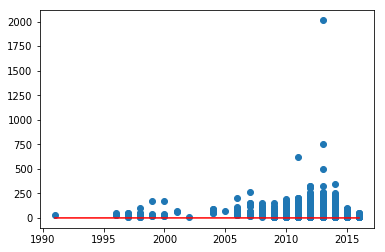

In [4]:
x = data.loc[:, ['vintage']]
y = data.loc[:, ['price']]

reg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x, y)
print(reg.score(x,y))

predict = reg.predict(x)

plt.scatter(x, y)  

plt.plot(x,predict,color = 'red')
plt.show()

0.16347237880496054


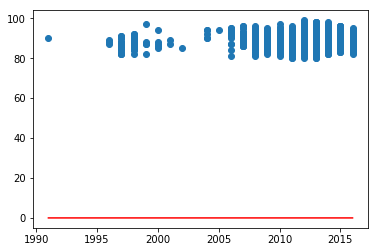

In [5]:
x = data.loc[:, ['vintage']]
y = data.loc[:, ['points']]

reg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x, y)
print(reg.score(x,y))

predict = reg.predict(x)

plt.scatter(x, y)  

plt.plot(x,predict,color = 'red')
plt.show()

0.16357486932458748


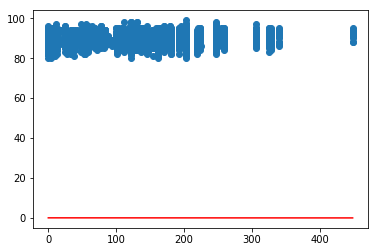

In [6]:
x = data.loc[:, ['total_fires']]
y = data.loc[:, ['points']]

reg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x, y)
print(reg.score(x,y))

predict = reg.predict(x)

plt.scatter(x, y)  
plt.plot(x,predict,color = 'red')
plt.show()

0.12411601926821769


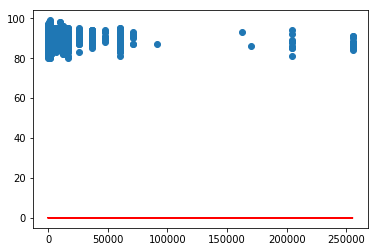

In [7]:
x = data.loc[:, ['sum_fire_size']]
y = data.loc[:, ['points']]

reg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x, y)
print(reg.score(x,y))

predict = reg.predict(x)

plt.scatter(x, y)  
plt.plot(x,predict,color = 'red')
plt.show()

0.16459977452085683


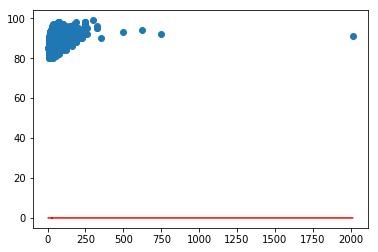

In [17]:
x = data.loc[:, ['vintage', 'price','total_fires','sum_fire_size', 'variety_numerical']]
y = data.loc[:, ['points']]

reg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x, y)
print(reg.score(x,y))

predict = reg.predict(x)

plt.scatter(x.iloc[:,1], y)  

plt.plot(x.iloc[:,1],predict,color = 'red')
plt.show()

Here, we convert the points into a binary value, 1 being good wines with a rating over 90, and 0 being bad wines with a score less than 90. We can then run logistic regression on the data with a binary output.

In [27]:
data['good_wine'] = 0
good_count= 0
for index, row in data.iterrows():
    if(row['points'] > 90):
        data.loc[index,'good_wine'] = 1
        good_count += 1
print(str(good_count) + ', ' + str(1-(good_count/data.shape[0])))
data.head()

4430, 0.5459669980526801


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,country,description,designation,points,price,province,...,total_fires,sum_fire_size,norm_vintage,norm_variety_numerical,norm_price,norm_points,norm_total_fires,norm_sum_fire_size,good_wine,expensive_wine
0,0,0,10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,...,0,0.00,0.009921,0.113960,0.006955,0.070707,0.000000,0.000000,0,0
1,3,3,23,23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,...,4,79.10,0.009921,0.464387,0.008445,0.070707,0.008929,0.000310,0,0
2,4,4,25,25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,...,0,0.00,0.009921,0.626781,0.031793,0.070707,0.000000,0.000000,0,1
3,12,12,60,60,US,"Syrupy and dense, this wine is jammy in plum a...",Estate,86,100.0,California,...,122,1339.78,0.010913,0.113960,0.047193,0.060606,0.272321,0.005246,0,1
4,13,13,63,64,US,There are intriguing touches to the nose of th...,Golden Horn,86,26.0,California,...,82,719.08,0.011905,0.732194,0.010432,0.060606,0.183036,0.002815,0,0


Here we can see that the price and the combination of all our features do have an effect on our regression, increasing the accuracy beyond randomly guessing. 

0.5459669980526801


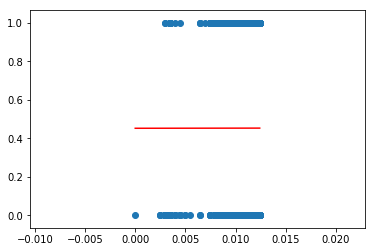

In [10]:
x = data.loc[:, ['norm_vintage']]
y = data.loc[:, ['good_wine']]

reg = LogisticRegression(random_state=0, solver='saga', multi_class='ovr').fit(x, y)
print(reg.score(x,y))

predict = reg.predict(x)

plt.scatter(x, y)  
x = x.sort_values(by = 'norm_vintage')
plt.plot(x,reg.predict_proba(x)[:,1],color = 'red')
plt.show()

0.5878856205800963


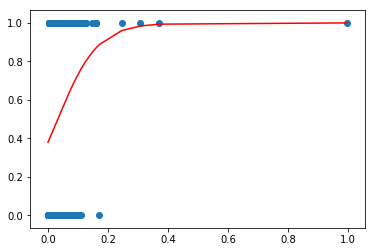

In [11]:
x = data.loc[:, ['norm_price']]
y = data.loc[:, ['good_wine']]

reg = LogisticRegression(random_state=0, solver='sag', multi_class='ovr').fit(x, y)
print(reg.score(x,y))

predict = reg.predict(x)

plt.scatter(x, y)  
x = x.sort_values(by = 'norm_price')
plt.plot(x,reg.predict_proba(x)[:,1],color = 'red')
plt.show()

0.5577534078097776


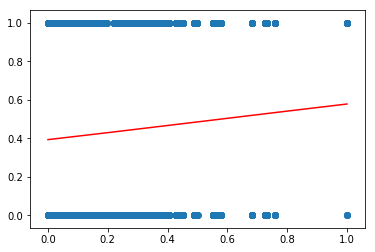

In [12]:
x = data.loc[:, ['norm_total_fires']]
y = data.loc[:, ['good_wine']]

reg = LogisticRegression(random_state=0, solver='saga', multi_class='ovr').fit(x, y)
print(reg.score(x,y))

predict = reg.predict(x)


plt.scatter(x, y)  
x = x.sort_values(by = 'norm_total_fires')
plt.plot(x,reg.predict_proba(x)[:,1],color = 'red')
plt.show()

0.5459669980526801


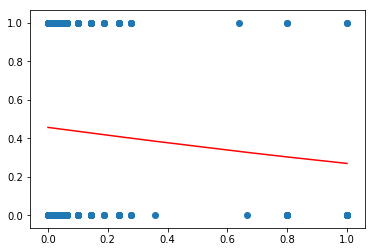

In [13]:
x = data.loc[:, ['norm_sum_fire_size']]
y = data.loc[:, ['good_wine']]

reg = LogisticRegression(random_state=0, solver='saga', multi_class='ovr').fit(x, y)
print(reg.score(x,y))

predict = reg.predict(x)

plt.scatter(x, y)  
x = x.sort_values(by = 'norm_sum_fire_size')
plt.plot(x,reg.predict_proba(x)[:,1],color = 'red')
plt.show()

0.6156605513989956


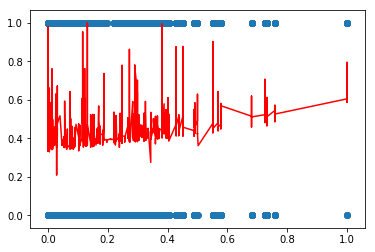

In [14]:
x = data.loc[:, ['norm_vintage', 'norm_price','norm_total_fires','norm_sum_fire_size', 'norm_variety_numerical']]
y = data.loc[:, ['good_wine']]

reg = LogisticRegression(random_state=0, solver='saga', multi_class='ovr').fit(x, y)
print(reg.score(x,y))

predict = reg.predict(x)

plt.scatter(x.iloc[:,2], y) 
x = x.sort_values(by = 'norm_total_fires')
plt.plot(x.iloc[:,2],reg.predict_proba(x)[:,1],color = 'red')
plt.show()


In [25]:
data['expensive_wine'] = 0
expensive= 0
for index, row in data.iterrows():
    if(row['price'] > 50):
        data.loc[index,'expensive_wine'] = 1
        expensive += 1
print(str(expensive) + ', ' + str(1 - (expensive/data.shape[0])))
data.head()

2898, 0.7029824741211438


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,country,description,designation,points,price,province,...,total_fires,sum_fire_size,norm_vintage,norm_variety_numerical,norm_price,norm_points,norm_total_fires,norm_sum_fire_size,good_wine,expensive_wine
0,0,0,10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,...,0,0.00,0.009921,0.113960,0.006955,0.070707,0.000000,0.000000,0,0
1,3,3,23,23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,...,4,79.10,0.009921,0.464387,0.008445,0.070707,0.008929,0.000310,0,0
2,4,4,25,25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,...,0,0.00,0.009921,0.626781,0.031793,0.070707,0.000000,0.000000,0,1
3,12,12,60,60,US,"Syrupy and dense, this wine is jammy in plum a...",Estate,86,100.0,California,...,122,1339.78,0.010913,0.113960,0.047193,0.060606,0.272321,0.005246,0,1
4,13,13,63,64,US,There are intriguing touches to the nose of th...,Golden Horn,86,26.0,California,...,82,719.08,0.011905,0.732194,0.010432,0.060606,0.183036,0.002815,0,0


0.7029824741211438


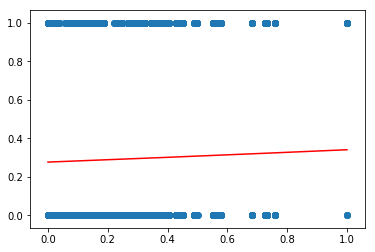

In [26]:
x = data.loc[:, ['norm_total_fires']]
y = data.loc[:, ['expensive_wine']]

reg = LogisticRegression(random_state=0, solver='saga', multi_class='ovr').fit(x, y)
print(reg.score(x,y))

predict = reg.predict(x)

plt.scatter(x, y)  
x = x.sort_values(by = 'norm_total_fires')
plt.plot(x,reg.predict_proba(x)[:,1],color = 'red')

plt.show()

From these logistical regressions, we can see that they don't do a really good job at predicting our output of the points of the wine. 